# Step 1: import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data

In [3]:
df_comp=pd.read_csv("1000_Companies.csv")
df_comp.head(4)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99


Step3: Understand the data, Data dictionary

In [4]:
df_comp.shape

(1000, 5)

In [31]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
df_comp.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [9]:
df_comp.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Step 3: Exploratory Data Analysis

In [13]:
corr=df_comp.corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


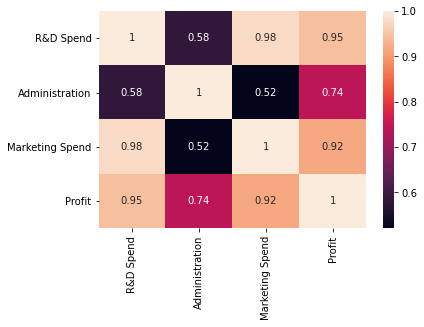

In [14]:
sns.heatmap(corr,annot=True)
plt.show()

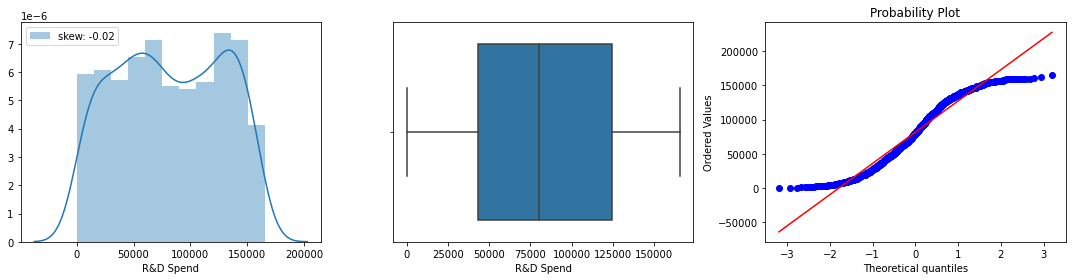

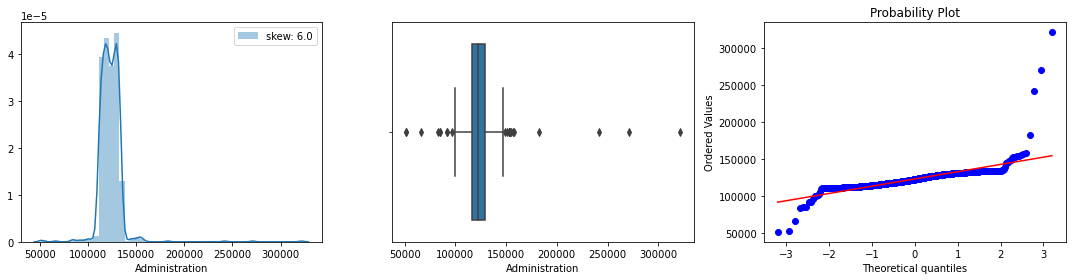

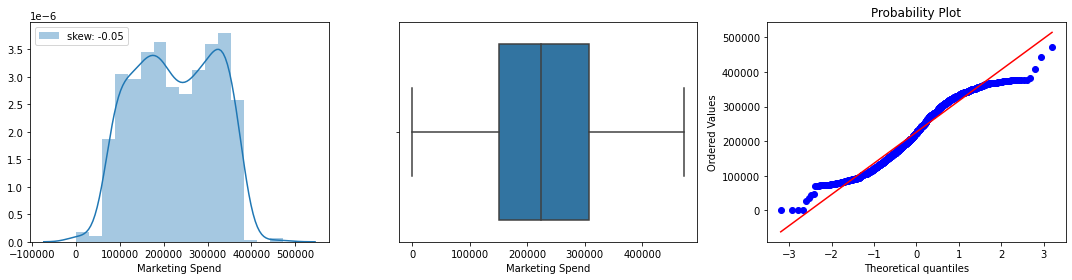

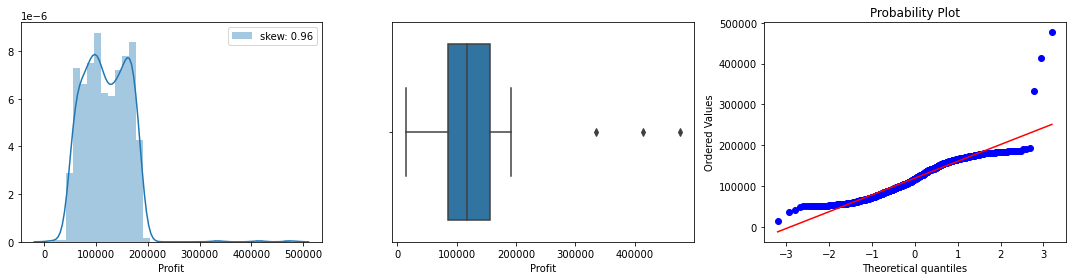

In [17]:
from scipy import stats
for i in df_comp.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df_comp[i], label="skew: " + str(np.round(df_comp[i].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df_comp[i])
    plt.subplot(133)
    stats.probplot(df_comp[i], plot=plt)
    plt.tight_layout()
    plt.show()
    
    

In [20]:
print(df_comp.Administration.mean())
print(df_comp.Administration.median())

122963.89761169997
122421.61215


In [21]:
print(df_comp.Profit.median())

117641.4663


In [22]:
# Finding skew before and after to compare the shape after treatment 
for X in df_comp.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,df_comp[X].skew(),np.max(abs(stats.zscore(df_comp[X])))))

The skewness and Max_Z-Score value for R&D Spend is -0.015613897044522113 and 1.7990227709769604 respectively
The skewness and Max_Z-Score value for Administration is 6.003594592844964 and 15.759378713249035 respectively
The skewness and Max_Z-Score value for Marketing Spend is -0.04788919904256987 and 2.6829682610445387 respectively
The skewness and Max_Z-Score value for Profit is 0.9597913396603033 and 8.32663195108068 respectively


In [27]:
# Outlier treatment and analysis

col_sel=['Administration','Profit']
def iqr_capping(df, cols, factor):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                           np.where(df[col]<lower_whisker, lower_whisker, df[col]))

iqr_capping(df_comp, col_sel, 1.5)

In [28]:
# Skewness and Z-Score after outlier treatment
for X in df_comp.describe().columns:
    print('The skewness and Max_Z-Score value for {} is {} and {} respectively'.format(X,df_comp[X].skew(),np.max(abs(stats.zscore(df_comp[X])))))

The skewness and Max_Z-Score value for R&D Spend is -0.015613897044522113 and 1.7990227709769604 respectively
The skewness and Max_Z-Score value for Administration is 0.11042968262691016 and 3.1433414262321113 respectively
The skewness and Max_Z-Score value for Marketing Spend is -0.04788919904256987 and 2.6829682610445387 respectively
The skewness and Max_Z-Score value for Profit is 0.07772612365789372 and 3.483592796140249 respectively


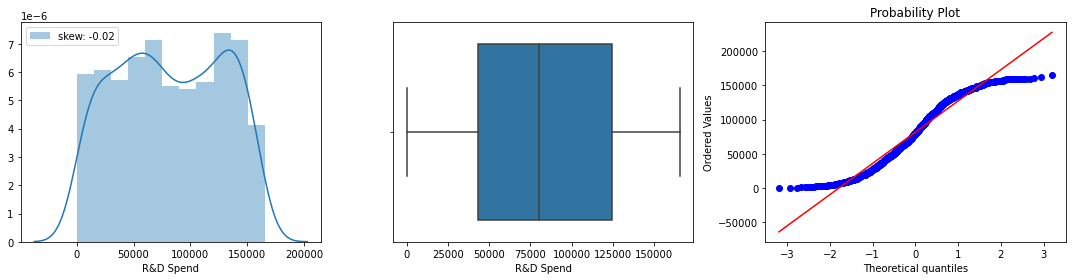

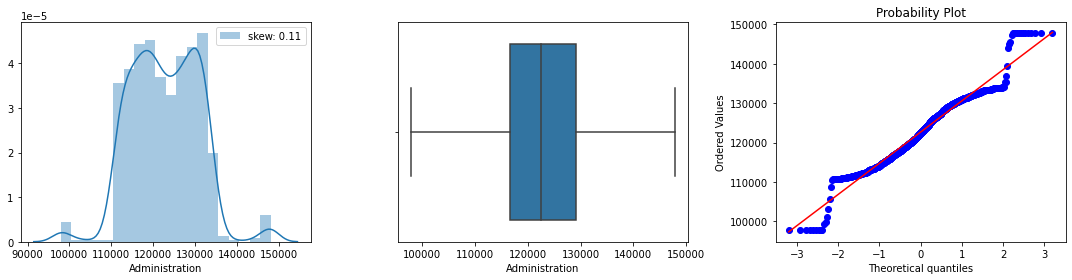

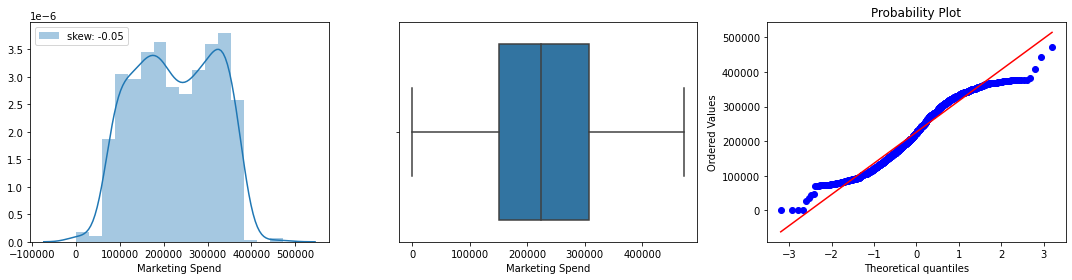

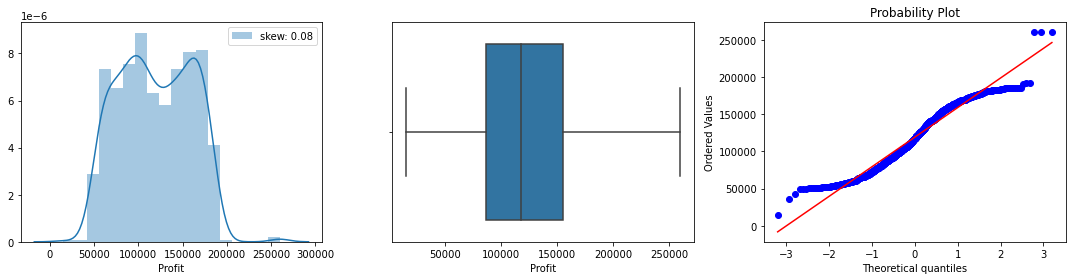

In [29]:
## After Treating an outlier
from scipy import stats
for i in df_comp.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df_comp[i], label="skew: " + str(np.round(df_comp[i].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df_comp[i])
    plt.subplot(133)
    stats.probplot(df_comp[i], plot=plt)
    plt.tight_layout()
    plt.show()


# Step 4: Divide data inot numerical and categorical

In [36]:
df_numerical=df_comp.select_dtypes(include=["float64"])
df_numerical.head(4)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.800000,471784.10,192261.83
1,162597.70,147886.767725,443898.53,191792.06
2,153441.51,101145.550000,407934.54,191050.39
3,144372.41,118671.850000,383199.62,182901.99


In [37]:
df_numerical.drop("Profit",axis=1)

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.800000,471784.1000
1,162597.70,147886.767725,443898.5300
2,153441.51,101145.550000,407934.5400
3,144372.41,118671.850000,383199.6200
4,142107.34,97893.035125,366168.4200
...,...,...,...
995,54135.00,118451.999000,173232.6695
996,134970.00,130390.080000,329204.0228
997,100275.47,147886.767725,227142.8200
998,128456.23,147886.767725,281692.3200


In [39]:
df_categorical=df_comp.select_dtypes(include=["object"])

In [40]:
df_dum=pd.get_dummies(df_categorical,drop_first=True)

In [41]:
df_dum

,State_Florida,State_New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


In [43]:
X=pd.concat([df_numerical,df_dum],axis=1)

In [44]:
X.head(4)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.800000,471784.10,192261.83,0,1
1,162597.70,147886.767725,443898.53,191792.06,0,0
2,153441.51,101145.550000,407934.54,191050.39,1,0
3,144372.41,118671.850000,383199.62,182901.99,0,1


In [45]:
X=X.drop("Profit",axis=1)

In [46]:
Y=df_comp["Profit"]

# Step5 : divide the data into testing and traning

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.3,random_state=10)

# Step 6: Model Building and Evaluation

In [49]:
from sklearn.linear_model import LinearRegression
Linear_Model=LinearRegression()
Linear_Model.fit(x_train,y_train)

LinearRegression()

In [59]:
# #display regression coefficients and R-squared value of model
print(Linear_Model.intercept_, Linear_Model.coef_, Linear_Model.score(X, Y))

34075.85529731911 [ 7.73983498e-01  1.14734886e-01  3.30570326e-02 -1.04822036e+02
 -3.19130413e+02] 0.97840848174597


In [50]:
y_train_pred=Linear_Model.predict(x_train)
y_test_pred=Linear_Model.predict(x_test)

In [51]:
print(y_test)

841     95065.53537
956     77362.05529
544     77132.25091
173     88870.21435
759    162399.92690
           ...     
644    117842.65190
886    116603.07510
189    181550.57660
247    155791.12890
5      156991.12000
Name: Profit, Length: 700, dtype: float64


In [52]:
print(y_train)

660    126846.88300
563    125981.48580
863    140589.86820
712     90108.93684
145    152520.90150
           ...     
320    175999.39130
527     69995.50080
996    164336.60550
125     86613.17655
265    130602.34780
Name: Profit, Length: 300, dtype: float64


In [55]:
#Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.969442243042685

In [64]:
# training Score
r2_score(y_train,y_train_pred)

0.9989396250965117

# RMSE


In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = mean_squared_error(y_test, y_test_pred, squared=False)
print (sqrt(rms))                     

83.97477610100584
